In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy
import scipy.spatial.distance
%matplotlib inline

In [7]:
data = pd.read_excel('X:/NIR.xlsx', sheet_name='2019_норм', index_col=0)
#data.info()
#y = [1,2,8,10,12,13,15,16,17,18,19,20,21]
data = data.iloc[:,:21]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 21 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                 --------------  -----  
 0   Индекс акций протестов                                                                                                                                 85 non-null     float64
 1   Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения)                                             85 non-null     float64
 2   Ожидаемая продолжительность жизни граждан (число лет)                                                                                              

In [3]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения),Ожидаемая продолжительность жизни граждан (число лет),"Оборот розничной торговли на душу населения, руб.",Объем телекоммуникационных услуг на душу населения(рублей),"Кол-во преступлений, связанных с незаконным оборотом наркотиков, на 1000 человек населения",Соотношение мужчин и женщин,"Суммарный коэффициент рождаемости, число детей на 1 женщину",Соотношение браков и разводов (на 1000 браков приходится разводов),"Численность занятых в возрасте 15-72 лет и старше , %","Уровень безработицы населения в возрасте 15-72 лет, %",Численность населения с денежными доходами ниже величины прожиточного минимума,"Младенческая смертность, число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми",Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения
Субъект РФ,,,,,,,,,,,,,
Алтайский край,-0.103593,-0.067065,-0.479464,-0.655365,0.715562,0.299778,0.087393,0.310759,-0.463010,-0.139157,1.727343,0.353781,-0.064231
Амурская область,0.272423,-1.378398,0.162312,0.140799,3.037907,-0.625056,0.149113,0.642188,0.010806,-0.295239,0.661743,1.515774,-0.922324
Архангельская область без автономного округа,-0.178797,0.126347,0.371700,-0.280373,-1.111461,-0.109283,-0.130098,0.573953,0.112338,-0.295239,-0.033213,-0.494159,0.647805
Астраханская область,0.096949,0.540249,0.224897,-0.373967,1.060671,-0.393848,0.422446,0.262019,-0.327634,0.155664,-0.149039,0.102540,-0.228546
Белгородская область,-0.655084,0.857444,0.155023,-0.238810,-0.947102,0.424275,-0.782570,0.135296,0.010806,-0.572717,-1.538951,-0.588374,-0.502406


In [4]:
# расчитаем инерцию (inertia), искажение (distortion) и метрику силуэта (silhouette)
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import numpy as np

inertia=[]
distortion = []
silhouette = []
rg = range(2,15)
for k in rg:
    kmeans = KMeans(n_clusters = k, random_state = 92).fit(scaled_data)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(scaled_data,
        kmeans.cluster_centers_,
        'euclidean'),axis = 1))/scaled_data.shape[0])
    preds = kmeans.predict(scaled_data)
    silhouette.append(silhouette_score(scaled_data,
    preds))
print('inertia: ', inertia)
print('distortion: ', distortion)
print('silhouette: ', silhouette)

inertia:  [785.6332605921916, 667.342770771864, 562.2918055975075, 517.6412710229888, 457.1011442442711, 427.9136525275162, 380.75147663009164, 356.9524130390929, 332.8603034638541, 307.2127124480293, 287.44223170208954, 261.74432991143766, 246.7684630571017]
distortion:  [2.729431598600599, 2.498079131931125, 2.320883547646556, 2.262898489641801, 2.164501894374389, 2.1038033325275878, 2.019011015726612, 1.921445369792376, 1.8668653981156178, 1.7853325067654617, 1.6796649524780793, 1.6520785095735808, 1.5885142290053933]
silhouette:  [0.5675310291911685, 0.291951038641763, 0.26035526915079843, 0.2730651050117025, 0.2900543912240373, 0.25972712005129767, 0.283090745136179, 0.10711972897197969, 0.19252115619601834, 0.1369356176734507, 0.12009030698613567, 0.12467023188546457, 0.121723074125158]


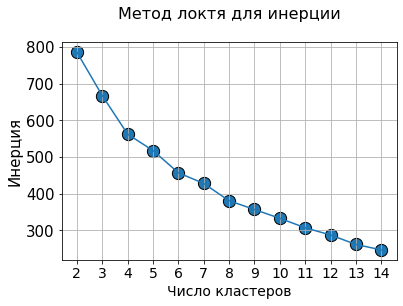

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Метод локтя для инерции\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=inertia,s=150,edgecolor='k')
plt.plot(rg, inertia);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Инерция",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


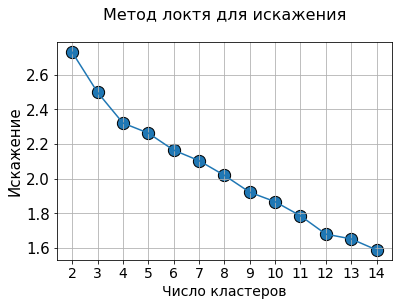

In [13]:
plt.title("Метод локтя для иcкажения\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=distortion,s=150,edgecolor='k')
plt.plot(rg, distortion);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Искажение",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

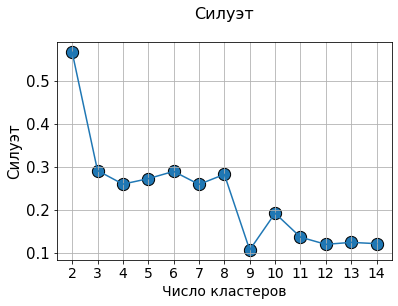

In [14]:
plt.title("Силуэт\n",fontsize=16)
plt.scatter(x=[i for i in rg],
y=silhouette,s=150,edgecolor='k')
plt.plot(rg,silhouette);
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [15]:
#Кластеризация методом К-средних
n_clusters = 6
features = scaled_data.columns
f_len = len(features)
kmeans = KMeans(n_clusters = n_clusters, random_state=92) 
kmeans.fit(scaled_data); 
scaled_data['kmeans'] = kmeans.labels_
cluster_dict={}
print('МЕТОД К-СРЕДНИХ')
for i in range(n_clusters):
    clust_list = scaled_data[scaled_data['kmeans']==i][features].index.values 
    print('Состав кластера {}: {}'.format(i, clust_list))


МЕТОД К-СРЕДНИХ
Состав кластера 0: ['Алтайский край' 'Амурская область' 'Астраханская область'
 'Еврейская автономная область' 'Забайкальский край'
 'Кабардино-Балкарская Республика' 'Карачаево-Черкесская Республика'
 'Республика Бурятия' 'Республика Дагестан' 'Республика Калмыкия'
 'Республика Саха (Якутия)' 'Республика Северная Осетия — Алания'
 'Республика Хакасия']
Состав кластера 1: ['Архангельская область без автономного округа' 'Белгородская область'
 'Брянская область' 'Владимирская область' 'Волгоградская область'
 'Вологодская область' 'Воронежская область' 'Ивановская область'
 'Иркутская область' 'Калининградская область' 'Калужская область'
 'Кемеровская область — Кузбасс' 'Кировская область' 'Костромская область'
 'Краснодарский край' 'Красноярский край' 'Курганская область'
 'Курская область' 'Ленинградская область' 'Липецкая область'
 'Московская область' 'Нижегородская область' 'Новгородская область'
 'Новосибирская область' 'Омская область' 'Оренбургская область'
 'Ор

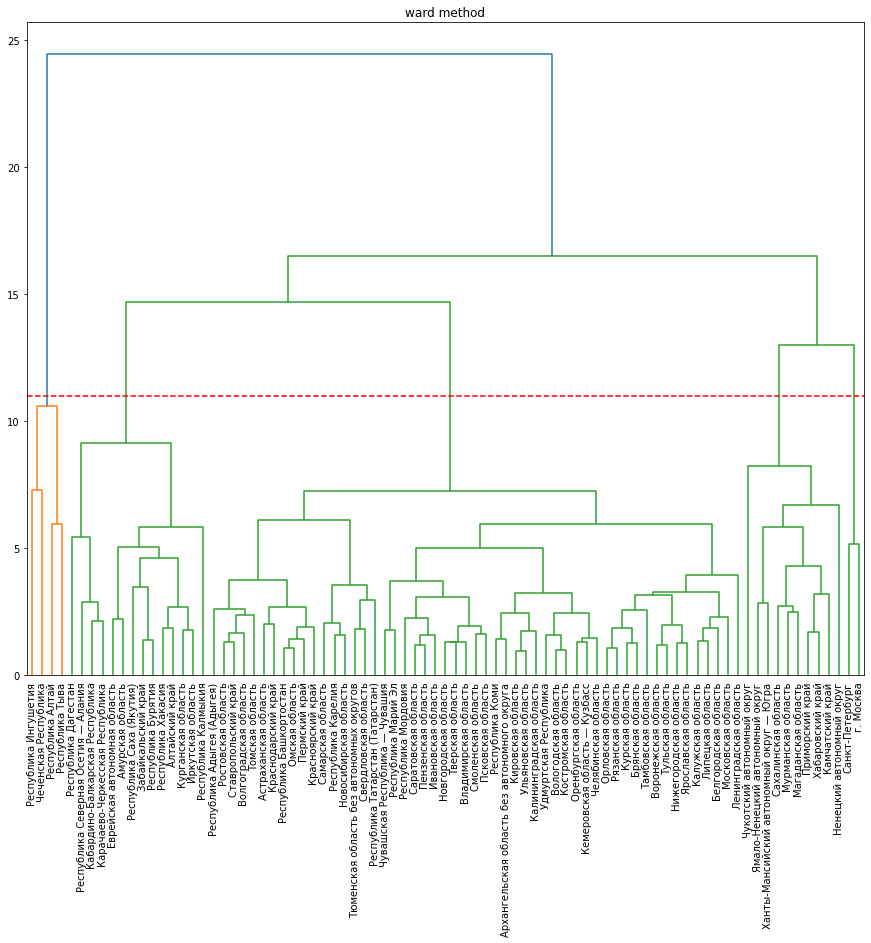

In [16]:
# Дендрограмма методом Уорда
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Z = hierarchy.linkage(scaled_data, method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) # задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=scaled_data.index, leaf_font_size=10)

# Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))
plt.axhline(y=11, color='r', linestyle='--') 

In [17]:
#Кластеризация методом Уорда
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(scaled_data);

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
ward.labels_ = cluster.fit_predict(scaled_data)
scaled_data['ward'] = ward.labels_
ward
print('МЕТОД УОРДА')
for i in range(n_clusters):
    clust_list = scaled_data[scaled_data['ward']==i][features].index.values 
    print('Состав кластера {}: {}'.format(i, clust_list))

МЕТОД УОРДА
Состав кластера 0: ['Алтайский край' 'Амурская область' 'Еврейская автономная область'
 'Забайкальский край' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Карачаево-Черкесская Республика'
 'Курганская область' 'Республика Бурятия' 'Республика Дагестан'
 'Республика Калмыкия' 'Республика Саха (Якутия)'
 'Республика Северная Осетия — Алания' 'Республика Хакасия']
Состав кластера 1: ['Камчатский край' 'Магаданская область' 'Мурманская область'
 'Ненецкий автономный округ' 'Приморский край' 'Сахалинская область'
 'Хабаровский край' 'Ханты-Мансийский автономный округ — Югра'
 'Чукотский автономный округ' 'Ямало-Ненецкий автономный округ']
Состав кластера 2: ['Республика Ингушетия' 'Чеченская Республика']
Состав кластера 3: ['Архангельская область без автономного округа' 'Астраханская область'
 'Белгородская область' 'Брянская область' 'Владимирская область'
 'Волгоградская область' 'Вологодская область' 'Воронежская область'
 'Ивановская область' 'Калининградская облас

In [190]:
#сохранение меток классов в файл
result = scaled_data[['ward','kmeans']]
result.to_excel('X:/data_result_classes.xlsx')

In [19]:
df1 = pd.DataFrame(columns = features[:13])
#таблица средних значений kmeans
for i in range(0, n_clusters):
    tmp = [] 
    for j in range (0, len(features)):
       tmp.append(scaled_data[scaled_data['kmeans']==i].iloc[:,j].mean())
    df1.loc[i]=tmp
df1

,Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения),Ожидаемая продолжительность жизни граждан (число лет),"Оборот розничной торговли на душу населения, руб.",Объем телекоммуникационных услуг на душу населения(рублей),"Кол-во преступлений, связанных с незаконным оборотом наркотиков, на 1000 человек населения",Соотношение мужчин и женщин,"Суммарный коэффициент рождаемости, число детей на 1 женщину",Соотношение браков и разводов (на 1000 браков приходится разводов),"Численность занятых в возрасте 15-72 лет и старше , %","Уровень безработицы населения в возрасте 15-72 лет, %",Численность населения с денежными доходами ниже величины прожиточного минимума,"Младенческая смертность, число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми",Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения
0,0.708217,0.125454,-0.469907,-0.254465,1.181920,-0.525185,0.424933,-0.334103,-0.629627,0.290401,0.777569,0.580865,-0.902663
1,-0.424005,0.004673,0.007225,-0.273891,-0.379539,0.443677,-0.337275,0.136005,0.086493,-0.243527,-0.197896,-0.289169,0.283654
2,0.381050,-0.729823,0.801365,1.319376,0.326491,-1.895716,0.231080,1.042936,1.246111,-0.229723,-0.555717,0.092071,0.029085
3,3.105082,3.441428,-2.393611,0.814428,-0.273224,1.402466,1.436423,-3.637148,-4.642741,7.057936,0.916561,1.013290,-2.182079
4,3.339047,-0.967075,-1.573397,-0.964368,0.745157,-1.164543,3.911115,-2.373168,-2.014192,2.242531,2.213812,2.730108,-1.950820
5,-1.219109,2.070137,2.806464,4.288175,0.304511,0.788874,-1.111745,-0.883361,1.449175,-1.049633,-0.890325,-0.839616,1.953203


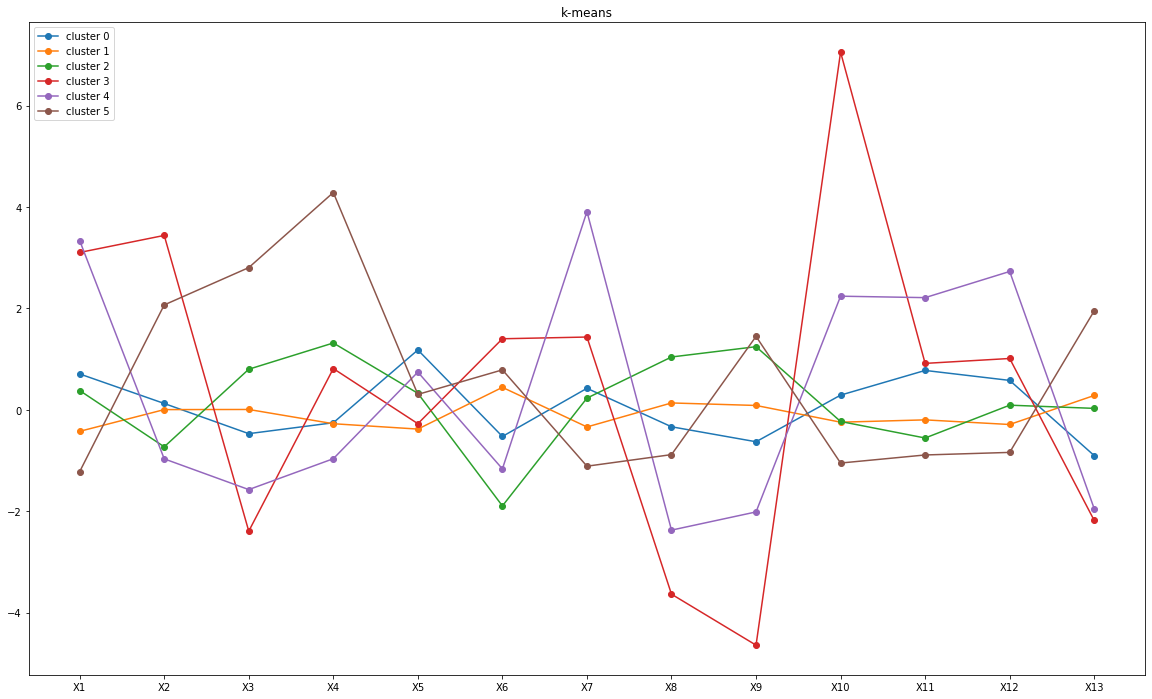

In [20]:
plt.figure(figsize=(20,12))
for i in range (0, n_clusters):
    plt.plot(df1.iloc[i], marker='o', label='cluster {}'.format(i))
    plt.legend(loc = 'upper left')
plt.title('k-means')
labels = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10','X11','X12','X13']
plt.xticks(list(range(13)), labels=labels)
None

In [21]:
df2 = pd.DataFrame(columns = features[:13])
#таблица средних значений kmeans
for i in range(0, n_clusters):
    tmp = [] 
    for j in range (0, len(features)):
       tmp.append(scaled_data[scaled_data['ward']==i].iloc[:,j].mean())
    df2.loc[i]=tmp
df2

,Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения),Ожидаемая продолжительность жизни граждан (число лет),"Оборот розничной торговли на душу населения, руб.",Объем телекоммуникационных услуг на душу населения(рублей),"Кол-во преступлений, связанных с незаконным оборотом наркотиков, на 1000 человек населения",Соотношение мужчин и женщин,"Суммарный коэффициент рождаемости, число детей на 1 женщину",Соотношение браков и разводов (на 1000 браков приходится разводов),"Численность занятых в возрасте 15-72 лет и старше , %","Уровень безработицы населения в возрасте 15-72 лет, %",Численность населения с денежными доходами ниже величины прожиточного минимума,"Младенческая смертность, число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми",Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения
0,0.678879,-0.057394,-0.551914,-0.243495,1.015637,-0.402740,0.455196,-0.207970,-0.635856,0.289448,0.833828,0.539969,-0.824517
1,0.292477,-0.724666,0.696802,1.235354,0.362440,-1.820227,0.168511,0.929752,1.120888,-0.208527,-0.475668,0.127664,0.087305
2,3.618971,2.350584,-1.920235,0.113090,-0.753320,-0.304921,2.626744,-3.817485,-3.508968,5.505791,1.449360,2.536442,-2.227723
3,-0.436096,0.063579,0.042635,-0.291364,-0.385181,0.459510,-0.358569,0.115801,0.103398,-0.257609,-0.239514,-0.308690,0.279214
4,-1.219109,2.070137,2.806464,4.288175,0.304511,0.788874,-1.111745,-0.883361,1.449175,-1.049633,-0.890325,-0.839616,1.953203
5,2.942141,-2.080483,-1.636667,-1.152428,1.734443,-0.740661,3.958140,-1.560841,-1.833691,1.386973,2.329638,2.065364,-1.789547


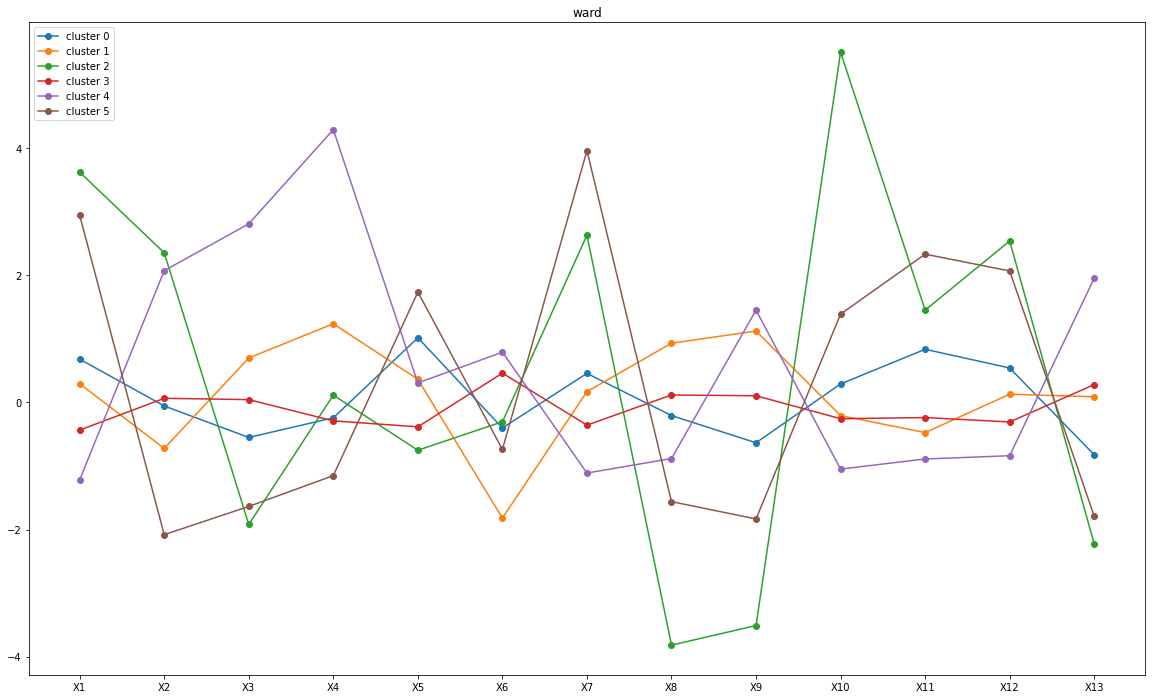

In [22]:
plt.figure(figsize=(20,12))
for i in range (0, n_clusters):
    plt.plot(df2.iloc[i], marker='o', label='cluster {}'.format(i))
    plt.legend(loc = 'upper left')
plt.title('ward')
labels = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10','X11','X12','X13']
plt.xticks(list(range(13)), labels = labels)
None

In [23]:
#DBScan

In [24]:
#Перебираем параметры
from sklearn.cluster import DBSCAN
result = []
for e in np.linspace(0.0000000000000001, 6, 10000):
    clustering = DBSCAN(eps=e, min_samples=2).fit(scaled_data[features])
    if len(clustering.labels_[clustering.labels_ == -1]) > 15:
        continue
    result.append((e, len(np.unique(clustering.labels_))))

In [25]:
#Первая строчка отсортированного массива содержит радиус, при котором метод формирует максимальное количество кластеров
sorted(result, key=lambda x: x[1], reverse=True)

[(2.489048904890489, 5),
 (2.4896489648964897, 5),
 (2.4902490249024902, 5),
 (2.490849084908491, 5),
 (2.4914491449144918, 5),
 (2.4920492049204923, 5),
 (2.492649264926493, 5),
 (2.4932493249324934, 5),
 (2.493849384938494, 5),
 (2.4944494449444945, 5),
 (2.495049504950495, 5),
 (2.495649564956496, 5),
 (2.4962496249624966, 5),
 (2.496849684968497, 5),
 (2.4974497449744977, 5),
 (2.4980498049804982, 5),
 (2.4986498649864988, 5),
 (2.4992499249924993, 5),
 (2.4998499849985, 5),
 (2.500450045004501, 5),
 (2.5010501050105014, 5),
 (2.501650165016502, 5),
 (2.5022502250225025, 5),
 (2.502850285028503, 5),
 (2.5034503450345036, 5),
 (2.504050405040504, 5),
 (2.5046504650465047, 5),
 (2.5052505250525052, 5),
 (2.505850585058506, 5),
 (2.5064506450645068, 5),
 (2.5070507050705073, 5),
 (2.507650765076508, 5),
 (2.5082508250825084, 5),
 (2.508850885088509, 5),
 (2.5094509450945095, 5),
 (2.51005100510051, 5),
 (2.510651065106511, 5),
 (2.5112511251125116, 5),
 (2.511851185118512, 5),
 (2.512

In [261]:
#Вставляем лучшие параметры и получаем метки классов
clustering = DBSCAN(eps=3.964596459645965, min_samples=2).fit(scaled_data[features])
scaled_data['DBSCAN'] = clustering.labels_
clustering.labels_

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  2, -1,  1,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  2,  0, -1,  3,  0],
      dtype=int64)

In [310]:
#Визуализация разбиения в различных парах признаков
import seaborn as sns
z = scaled_data[features].copy()
z['color']=clustering.labels_
palette=['green','orange','brown','dodgerblue','red']

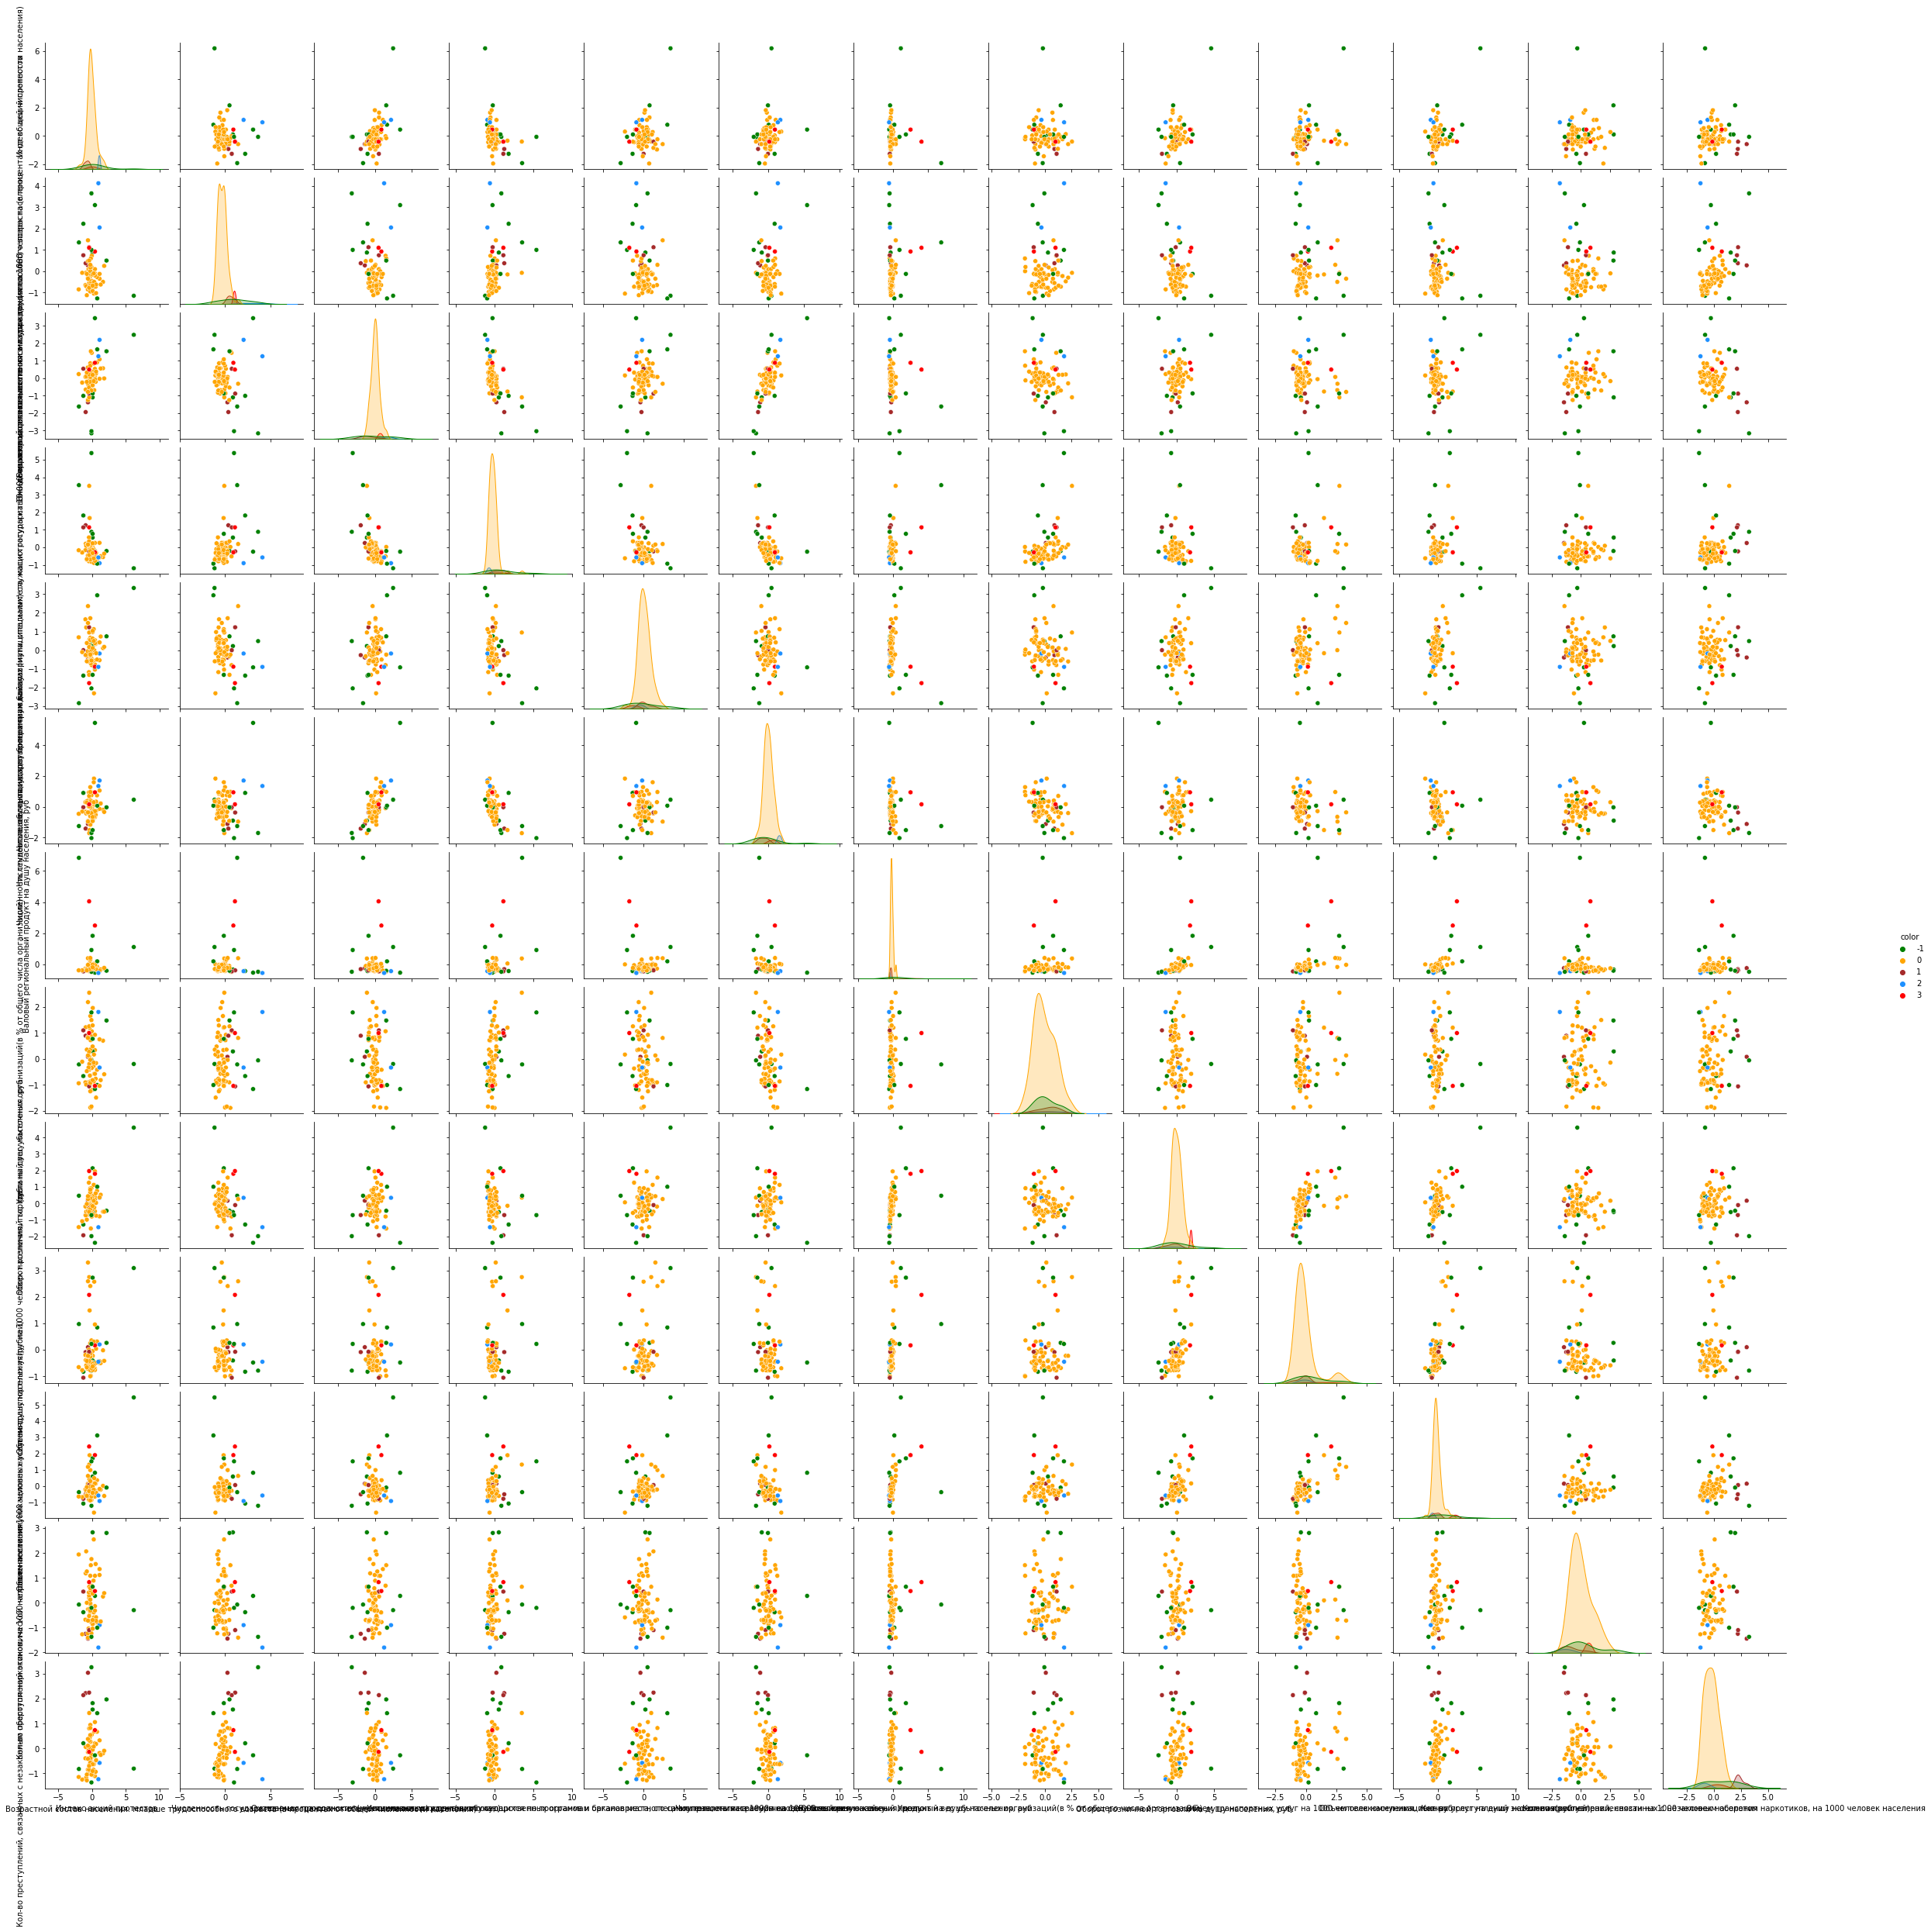

In [311]:
sns.pairplot(z, hue='color', palette=palette)

In [229]:
#Сохранение меток классов в файл
result = scaled_data[['ward','kmeans', 'DBSCAN']]
result.to_excel('X:/data_result_classes.xlsx')

In [26]:
#Бёрч
#Запускаем кластеризацию со значениями по умолчанию
from sklearn.cluster import Birch
brc = Birch(n_clusters=None)
X = scaled_data[features]
brc.fit_predict(X)

array([ 2,  3, 49,  4, 50,  5,  6,  7,  8, 51,  0,  9, 10, 52, 11, 73, 53,
       12, 13, 74, 14, 15,  8, 16, 17, 18, 54, 55, 56, 19, 57, 20, 58, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 59, 75, 60, 31, 76, 77, 78, 32,
       61, 33, 34, 62, 79, 63, 80, 35, 36, 37, 38,  1, 39, 40, 64, 41, 42,
       65, 66, 43, 67, 44, 45, 68, 46, 69, 47, 81, 70, 48, 71, 72])

In [27]:
#Подбираем параметры, подсчитывая количество объектов в каждом кластере
for n_clusters in range (2,10):
    brc = Birch(threshold = 0.01, n_clusters=n_clusters, branching_factor = 1000)
    brc.fit_predict(X)
    print('Количество кластеров:', n_clusters)
    for i in range(0,n_clusters):
        print(i, sum(map(lambda item: item==i, brc.fit_predict(X))))

Количество кластеров: 2
0 80
1 3
Количество кластеров: 3
0 66
1 3
2 14
Количество кластеров: 4
0 13
1 3
2 14
3 53
Количество кластеров: 5
0 3
1 11
2 14
3 53
4 2
Количество кластеров: 6
0 14
1 11
2 2
3 53
4 2
5 1
Количество кластеров: 7
0 11
1 53
2 2
3 10
4 2
5 1
6 4
Количество кластеров: 8
0 53
1 10
2 2
3 10
4 2
5 1
6 4
7 1
Количество кластеров: 9
0 2
1 10
2 17
3 36
4 2
5 1
6 4
7 1
8 10


In [28]:
#Для 6 кластеров
n_clusters=5
brc = Birch(threshold = 0.01, n_clusters=n_clusters, branching_factor = 1000)
brc.fit_predict(X)

array([2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       2, 3, 2, 2, 0, 2, 3, 3, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 4, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 1, 1, 3], dtype=int64)

In [30]:
scaled_data['Birch'] = brc.labels_
result = scaled_data[['ward','kmeans', 'DBSCAN','Birch']]
result.to_excel('X:/data_result_classes.xlsx')

KeyError: "['DBSCAN'] not in index"

In [31]:
scaled_data.head()

,Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения),Ожидаемая продолжительность жизни граждан (число лет),"Оборот розничной торговли на душу населения, руб.",Объем телекоммуникационных услуг на душу населения(рублей),"Кол-во преступлений, связанных с незаконным оборотом наркотиков, на 1000 человек населения",Соотношение мужчин и женщин,"Суммарный коэффициент рождаемости, число детей на 1 женщину",Соотношение браков и разводов (на 1000 браков приходится разводов),"Численность занятых в возрасте 15-72 лет и старше , %","Уровень безработицы населения в возрасте 15-72 лет, %",Численность населения с денежными доходами ниже величины прожиточного минимума,"Младенческая смертность, число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми",Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения,kmeans,ward,Birch
Субъект РФ,,,,,,,,,,,,,,,,
Алтайский край,-0.103593,-0.067065,-0.479464,-0.655365,0.715562,0.299778,0.087393,0.310759,-0.463010,-0.139157,1.727343,0.353781,-0.064231,0,0,2
Амурская область,0.272423,-1.378398,0.162312,0.140799,3.037907,-0.625056,0.149113,0.642188,0.010806,-0.295239,0.661743,1.515774,-0.922324,0,0,2
Архангельская область без автономного округа,-0.178797,0.126347,0.371700,-0.280373,-1.111461,-0.109283,-0.130098,0.573953,0.112338,-0.295239,-0.033213,-0.494159,0.647805,1,3,3
Астраханская область,0.096949,0.540249,0.224897,-0.373967,1.060671,-0.393848,0.422446,0.262019,-0.327634,0.155664,-0.149039,0.102540,-0.228546,0,3,3
Белгородская область,-0.655084,0.857444,0.155023,-0.238810,-0.947102,0.424275,-0.782570,0.135296,0.010806,-0.572717,-1.538951,-0.588374,-0.502406,1,3,3


In [32]:
df2 = pd.DataFrame(columns = features[:13])
#таблица средних значений kmeans
for i in range(0, n_clusters):
    tmp = [] 
    for j in range (0, len(features)):
       tmp.append(scaled_data[scaled_data['Birch']==i].iloc[:,j].mean())
    df2.loc[i]=tmp
df2

,Возрастной состав населения: младше трудоспособного возраста (в процентах от общей численности населения),Ожидаемая продолжительность жизни граждан (число лет),"Оборот розничной торговли на душу населения, руб.",Объем телекоммуникационных услуг на душу населения(рублей),"Кол-во преступлений, связанных с незаконным оборотом наркотиков, на 1000 человек населения",Соотношение мужчин и женщин,"Суммарный коэффициент рождаемости, число детей на 1 женщину",Соотношение браков и разводов (на 1000 браков приходится разводов),"Численность занятых в возрасте 15-72 лет и старше , %","Уровень безработицы населения в возрасте 15-72 лет, %",Численность населения с денежными доходами ниже величины прожиточного минимума,"Младенческая смертность, число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми",Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения
0,3.631505,0.515750,-1.943240,-0.331481,0.584306,-0.488702,3.288034,-3.354458,-3.328467,4.329399,2.105708,2.646361,-2.163822
1,0.397762,-0.687390,0.657337,1.179343,0.291411,-1.798885,0.255988,0.848667,1.027663,-0.173842,-0.357526,0.133945,0.030376
2,0.734386,-0.106853,-0.662398,-0.365171,1.060508,-0.334140,0.610546,-0.260191,-0.692666,0.334043,0.863612,0.616239,-0.896243
3,-0.436096,0.063579,0.042635,-0.291364,-0.385181,0.459510,-0.358569,0.115801,0.103398,-0.257609,-0.239514,-0.308690,0.279214
4,-1.219109,2.070137,2.806464,4.288175,0.304511,0.788874,-1.111745,-0.883361,1.449175,-1.049633,-0.890325,-0.839616,1.953203


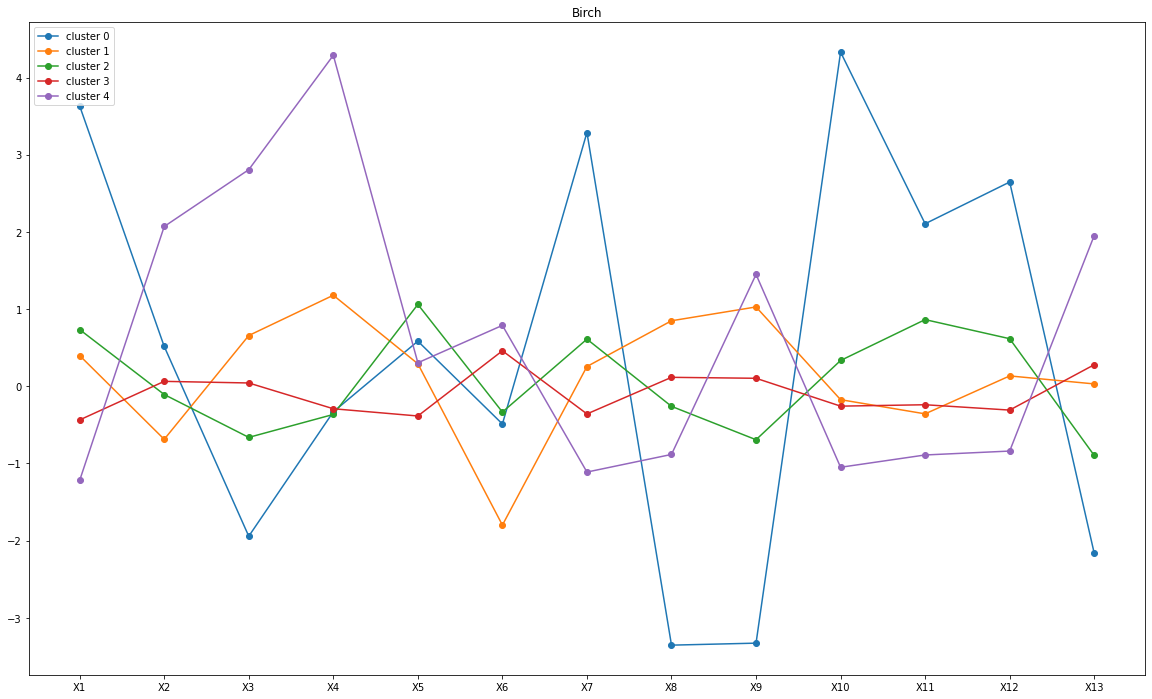

In [33]:
plt.figure(figsize=(20,12))
for i in range (0, n_clusters):
    plt.plot(df2.iloc[i], marker='o', label='cluster {}'.format(i))
    plt.legend(loc = 'upper left')
plt.title('Birch')
labels = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10','X11','X12','X13']
plt.xticks(list(range(13)), labels = labels)
None

In [279]:
#Визаулизация разбиений в главных компонентах
from sklearn.decomposition import PCA
features = scaled_data.columns[:13]
X =scaled_data[features]

In [281]:
#Количество ГК с собственными значениями большими 1
pca = PCA()
pca.fit(X)
len(pca.singular_values_[pca.singular_values_>1])

13

In [284]:
#Оценка уровня информативности для 2 главных компонент
sum(pca.explained_variance_ratio_[:2])

0.4627014635187429

In [285]:
#Информативность ГК
pca.explained_variance_ratio_

array([0.23762577, 0.22507569, 0.11374335, 0.10226793, 0.08532891,
       0.06622049, 0.04827322, 0.0378723 , 0.02453032, 0.02264776,
       0.01490286, 0.01276804, 0.00874335])

In [288]:
c = pca.transform(X)

Text(0.5, 1.0, 'kmeans')

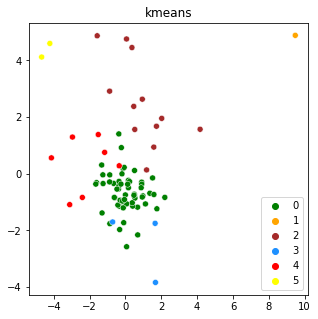

In [300]:
#Визуализация К-средних в ГК
plt.figure(figsize=(5, 5))
palette=['green','orange','brown','dodgerblue','red', 'yellow']
sns.scatterplot(x = c[:, 0], y = c[:, 1], hue = kmeans.labels_, palette=palette)
plt.title('kmeans')

Text(0.5, 1.0, 'ward')

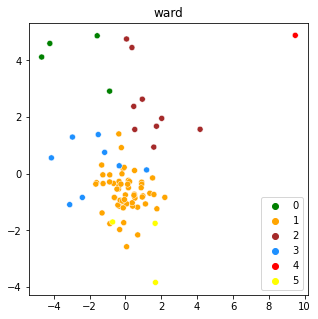

In [301]:
#Визуализация метода Уорда в ГК
plt.figure(figsize=(5,5))
palette=['green','orange','brown','dodgerblue','red', 'yellow']
sns.scatterplot(x = c[:, 0], y = c[:, 1], hue = ward.labels_, palette=palette)
plt.title('ward')

Text(0.5, 1.0, 'DBSCAN')

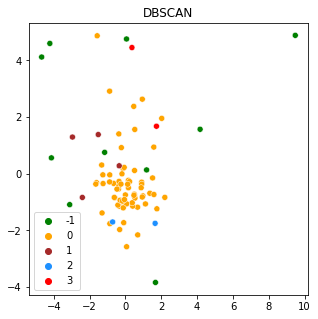

In [302]:
#Визуализация DBSCAN в ГК
plt.figure(figsize=(5,5))
palette=['green','orange','brown','dodgerblue','red']
sns.scatterplot(x = c[:, 0], y = c[:, 1], hue = clustering.labels_, palette=palette)
plt.title('DBSCAN')

Text(0.5, 1.0, 'Birch')

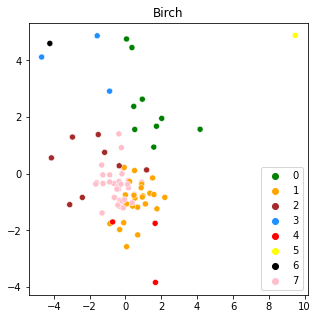

In [303]:
#Визуализация Birch в ГК
plt.figure(figsize=(5,5))
palette=['green','orange','brown','dodgerblue','red', 'yellow', 'black', 'pink']
sns.scatterplot(x = c[:, 0], y = c[:, 1], hue = brc.labels_, palette=palette)
plt.title('Birch')